### Import all dependencies

In [1]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Define Few Parameters

In [2]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 3

#define paths
covid_path = 'Ct_Scan_Dataset/covidct'
noncovid_path = 'Ct_Scan_Dataset/normalct'

Penomoni = 'Ct_Scan_Dataset/Penomoni'
Boronsit = 'Ct_Scan_Dataset/Boronsit'
Possible_Covid = 'Ct_Scan_Dataset/Possible Covid'
possible_Penomoni = 'Ct_Scan_Dataset/possible Penomoni'



# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

Possible_Covid_files = glob(Possible_Covid + '/*')
Penomoni_files = glob(Penomoni + '/*')
Boronsit_files = glob(Boronsit + '/*')
possible_Penomoni_files = glob(possible_Penomoni + '/*')

In [3]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))

print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))

print("First 5 Possible_Covid Files: ",Possible_Covid_files[0:5])
print("Total Count: ",len(Possible_Covid_files))


print("First 5 Penomoni Files: ",Penomoni_files[0:5])
print("Total Count: ",len(Penomoni_files))

print("First 5 Boronsit Files: ",Boronsit_files[0:5])
print("Total Count: ",len(Boronsit_files))

print("First 5 possible_Penomoni Files: ",possible_Penomoni_files[0:5])
print("Total Count: ",len(possible_Penomoni_files))

First 5 Covid Files:  ['Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%10.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%11.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%12.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%13.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%14.png']
Total Count:  24
First 5 NonCovid Files:  ['Ct_Scan_Dataset/normalct\\0.jpg', 'Ct_Scan_Dataset/normalct\\1%0.jpg', 'Ct_Scan_Dataset/normalct\\1%1.jpg', 'Ct_Scan_Dataset/normalct\\1%2.jpg', 'Ct_Scan_Dataset/normalct\\2%0.jpg']
Total Count:  19
First 5 Possible_Covid Files:  ['Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%10.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%11.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%12.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%13.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%14.png']
Total Count:  12
First 5 Penomoni Files:  ['Ct_Scan_Datas

### Fetch Images and Class Labels from Files (This might take a while)

In [4]:
# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []
Possible_Covid_labels=[]
Penomoni_labels=[]
Boronsit_labels=[]
possible_Penomoni_labels=[]


covid_images=[]
noncovid_images=[]
Possible_Covid=[]
Penomoni=[]
Boronsit=[]
possible_Penomoni=[]


for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per kera
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') # append class label

for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

for i in range(len(Possible_Covid_files)):
  image = cv2.imread(Possible_Covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Possible_Covid.append(image)
  Possible_Covid_labels.append('Possible_Covid_files')

for i in range(len(Penomoni_files)):
  image = cv2.imread(Penomoni_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Penomoni.append(image)
  Penomoni_labels.append('Penomoni_files')



for i in range(len(Boronsit_files)):
  image = cv2.imread(Boronsit_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Boronsit.append(image)
  Boronsit_labels.append('Boronsit_files')



for i in range(len(possible_Penomoni_files)):
  image = cv2.imread(possible_Penomoni_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  possible_Penomoni.append(image)
  possible_Penomoni_labels.append('possible_Penomoni_files')


### Visualize First 40 Images from Data set

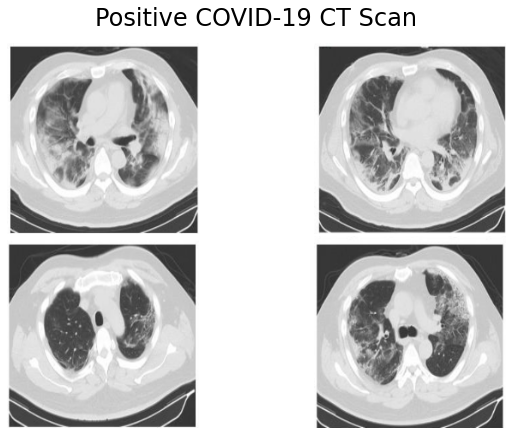

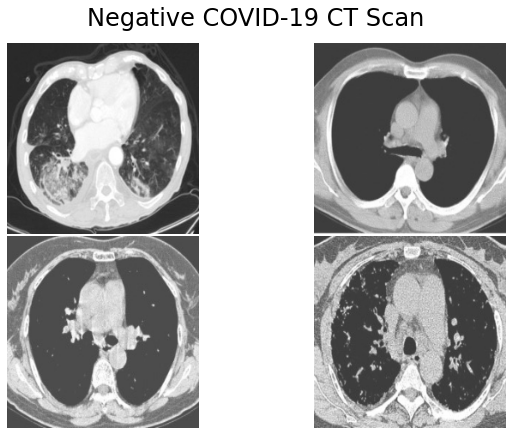

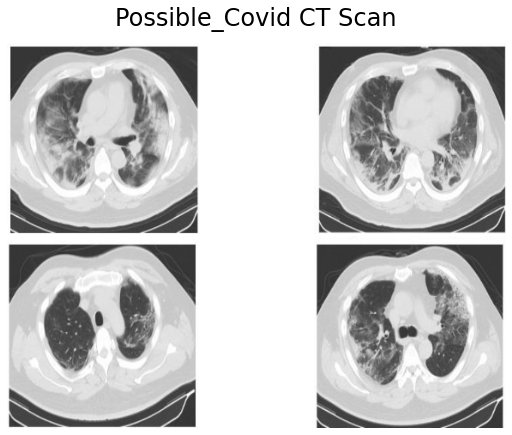

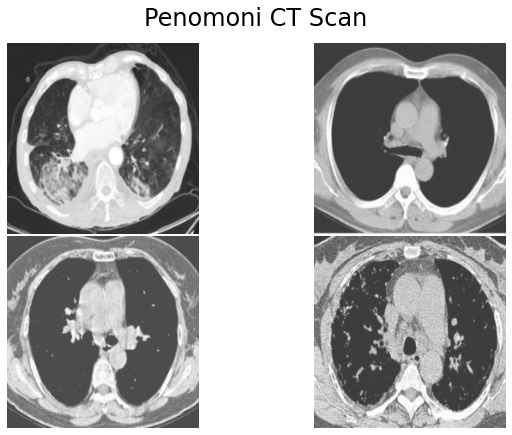

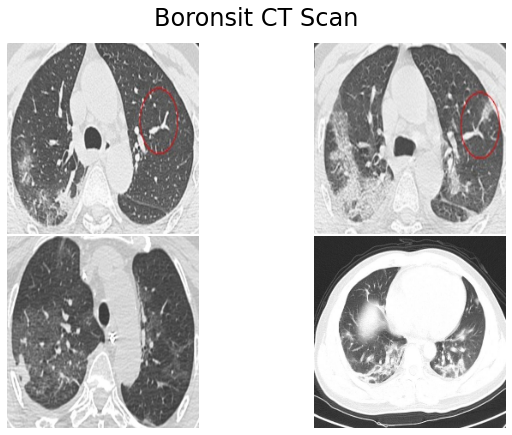

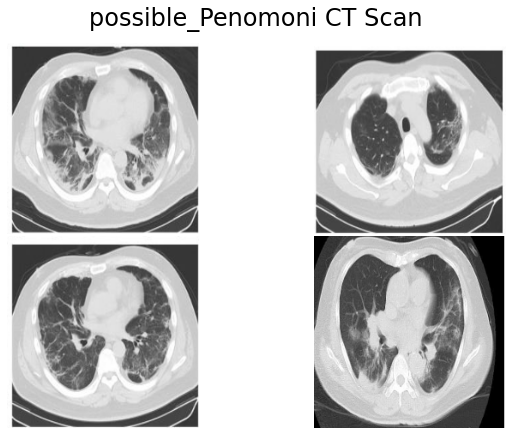

In [5]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 2,2
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
    
    
plot_images(covid_images, 'Positive COVID-19 CT Scan')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')
plot_images(Possible_Covid, 'Possible_Covid CT Scan')
plot_images(Penomoni, 'Penomoni CT Scan')
plot_images(Boronsit, 'Boronsit CT Scan')
plot_images(possible_Penomoni, 'possible_Penomoni CT Scan')

### **Normalization**
#### Model takes images in the form of array of pixels. Hence convert into array and *normalize*

In [6]:
# Convert to array and Normalize to interval of [0,1,2,3,4,5]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

Possible_Covid= np.array(Possible_Covid) / 255
Penomoni= np.array(Penomoni) / 255
Boronsit= np.array(Boronsit) / 255
possible_Penomoni= np.array(possible_Penomoni) / 255

In [7]:
print('shape of all images:')
print(covid_images.shape)
print(noncovid_images.shape)
print(Possible_Covid.shape)
print(Penomoni.shape)
print(Boronsit.shape)
print(possible_Penomoni.shape)
all_images=np.concatenate((covid_images,noncovid_images,Possible_Covid,
                           Penomoni,Boronsit,possible_Penomoni),axis=0)
print('total images:%s'%(str(all_images.shape)))

shape of all images:
(24, 224, 224, 3)
(19, 224, 224, 3)
(12, 224, 224, 3)
(16, 224, 224, 3)
(12, 224, 224, 3)
(12, 224, 224, 3)
total images:(95, 224, 224, 3)


In [8]:
print('length of the labels:')
print(len(covid_labels))
print(len(noncovid_labels))
print(len(Possible_Covid_labels))
print(len(Penomoni_labels))
print(len(Boronsit_labels))
print(len(possible_Penomoni_labels))
all_labels=np.array(covid_labels+noncovid_labels+Possible_Covid_labels+\
            Penomoni_labels+Boronsit_labels+possible_Penomoni_labels)      

all_labels=all_labels.reshape(-1,1)  
print("labels shape: %s"%(str(all_labels.shape)))

length of the labels:
24
19
12
16
12
12
labels shape: (95, 1)


###  Convert Categorical label to one-hot

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_labels = encoder.fit_transform(all_labels)
print(onehot_labels.shape)

(95, 6)


### **Train Test Split**

In [10]:
# Split into training and testing sets for both types of images
X_train,X_test,y_train,y_test=train_test_split(all_images,onehot_labels,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76, 224, 224, 3)
(76, 6)
(19, 224, 224, 3)
(19, 6)


### Visualize a few images from Training and Test sets

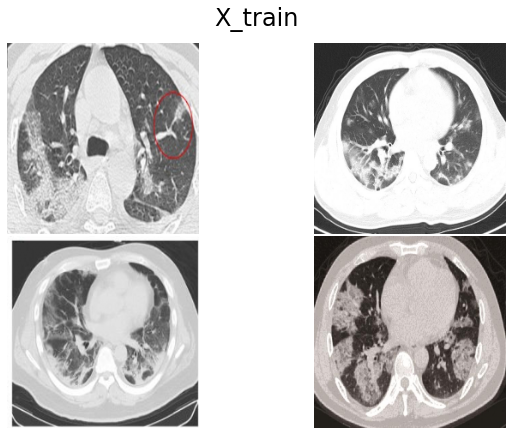

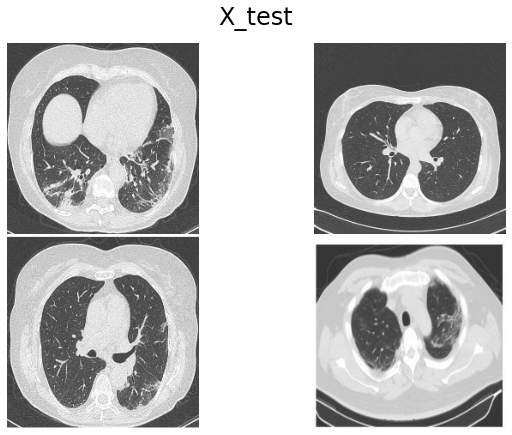

In [11]:
plot_images(X_train, 'X_train')
plot_images(X_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

### **Building and Visualizing model**

In [12]:
# Building Model
xception = Xception(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = xception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(6, activation="softmax")(outputs)

model = Model(inputs=xception.input, outputs=outputs)

for layer in xception.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Visualize Model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

### **Image Augmentation**
To train on images at different positions, angles, flips, etc

In [14]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

### **Training the model**

In [15]:
print(X_train.shape)
print(y_train.shape)

(76, 224, 224, 3)
(76, 6)


In [23]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/5
26/25 [==============================] - 167s 6s/step - loss: 5.6658 - acc: 0.3026 - val_loss: 10.7435 - val_acc: 0.3684
Epoch 2/5
26/25 [==============================] - 90s 3s/step - loss: 5.1092 - acc: 0.3553 - val_loss: 10.5670 - val_acc: 0.3684
Epoch 3/5
26/25 [==============================] - 90s 3s/step - loss: 4.6392 - acc: 0.5000 - val_loss: 12.2386 - val_acc: 0.3158
Epoch 4/5
26/25 [==============================] - 78s 3s/step - loss: 6.5451 - acc: 0.3947 - val_loss: 10.3458 - val_acc: 0.3158
Epoch 5/5
26/25 [==============================] - 148s 6s/step - loss: 7.1640 - acc: 0.3553 - val_loss: 11.4812 - val_acc: 0.3158


In [24]:
# Save Model and Weights
model.save('xception_ct.h5')
model.save_weights('xception_weights_ct.hdf5')

In [25]:
# Load saved model
model = load_model('xception_ct.h5')

### **Making Predicions**

In [26]:
y_pred = model.predict(X_test, batch_size=batch_size)

### Visulaizing First 10 predictions

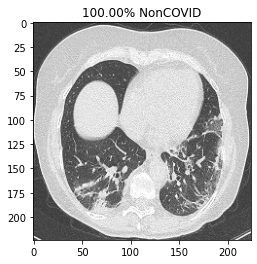

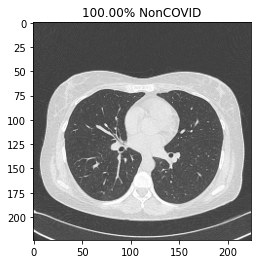

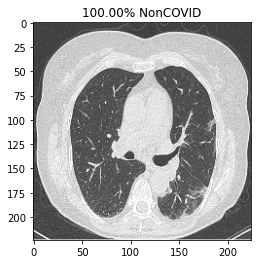

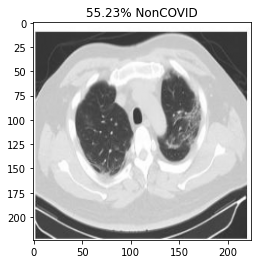

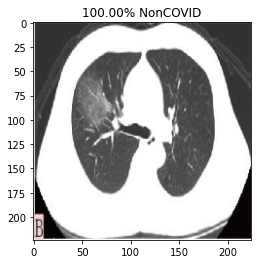

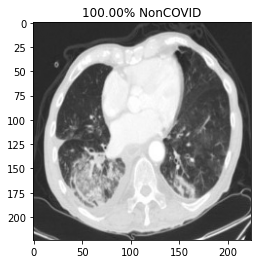

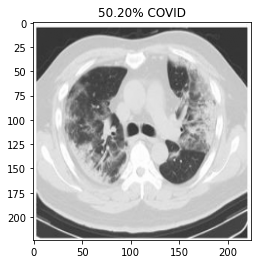

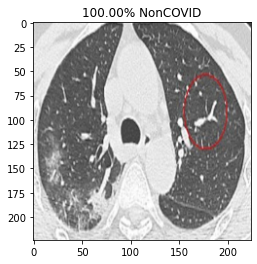

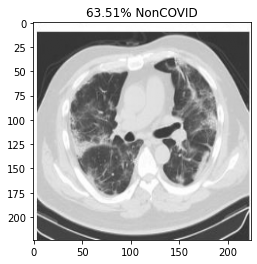

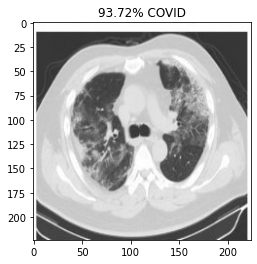

In [27]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

In [28]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

### Plot ROC Curve

In [30]:
#fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
#plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
#plt.rcParams['font.size'] = 12
#plt.title('ROC curve for our model')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.grid(True)

### Plot Confusion Matrix

Confusion Matrix without Normalization


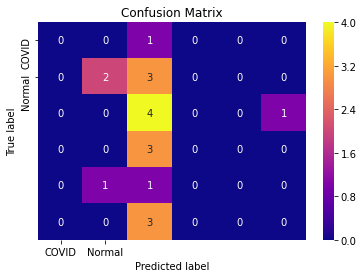

Confusion Matrix with Normalized Values


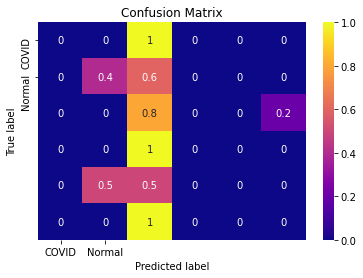

In [35]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal','Possible_Covid','Penomoni','Boronsit','possible_Penomoni']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

### **Classification Report**

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.40      0.50         5
           2       0.27      0.80      0.40         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3

    accuracy                           0.32        19
   macro avg       0.16      0.20      0.15        19
weighted avg       0.25      0.32      0.24        19



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Accuracy and Loss Plots**

In [37]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_ct_accuracy.png')
plt.show()


KeyError: 'accuracy'

<Figure size 720x720 with 0 Axes>

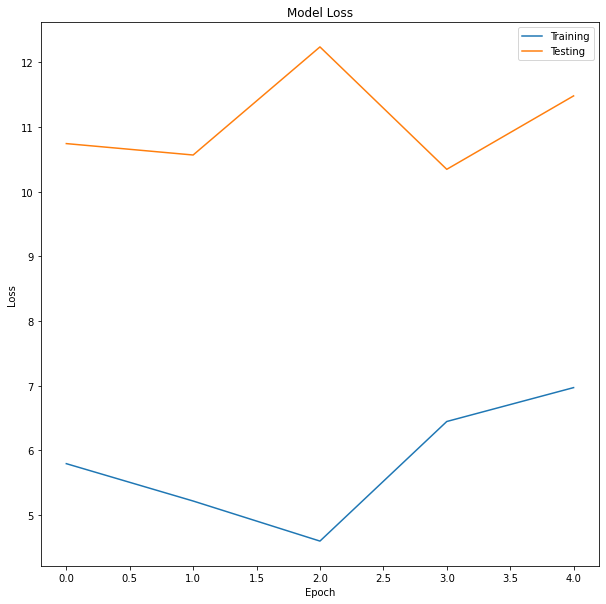

In [38]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_ct_loss.png')
plt.show()